# Predicting Car Sale Prices using KNN Regressor

In this project we are going to predict a cars market price using its attributes. The data in hand is quite self-explanatory, like weight of the car, make, num-of-doors etc. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names =cols)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [5]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


At the first glance, there it seems some features numerical, ordinal and nominal. Also some of the columns can be converted into numeric although they are not (i.e. num-of-doors, num-of-cylinders). However on the other hand, even if the number of doors could be thought related with the price, since 2 door cars are mostly sports cars which tend to be more expensive, the fasion of the relation makes it pointless to use that column since the price do not increase with the number of doors. But number of cylinders could.

Although info() method did not show any null values, there are "?"s, which indicates null values which are to be handled carefully.

Name of the columns that can be used, after some manipulations, are __['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']__. The target column is ___"price"___

In [6]:
Main= cars[ ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', "price"]]

In [7]:
Main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 25.7+ KB


## Data Cleaning

Now let us deal with the issues of the columns one by one

It is easy to deal with null values rather than "?"s. So let us convert them into nulls

In [8]:
Main["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [9]:
Main["normalized-losses"].replace("?", np.nan, inplace = True)

C:\Users\Nil\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
Main["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [11]:
def cyl_rep(cyl):
    cylinder_dict = {"four":4, "six": 6, "five":5, "three":3, "twelve":12, "two":2, "eight":8}
    return cylinder_dict[cyl]

Main["num-of-cylinders"] = Main["num-of-cylinders"].apply(cyl_rep)

C:\Users\Nil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
Main["bore"].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [13]:
Main["bore"].replace("?", np.nan, inplace = True)

In [14]:
Main["stroke"].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [15]:
Main["stroke"].replace("?", np.nan, inplace = True)

In [16]:
Main["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [17]:
Main["horsepower"].replace("?", np.nan, inplace = True)

In [18]:
Main["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [19]:
Main["peak-rpm"].replace("?", np.nan, inplace = True)

In [20]:
Main["price"].replace("?", np.nan, inplace=True)

In [21]:
Main[["normalized-losses", "bore","stroke", "horsepower", "peak-rpm","price"]] = Main[["normalized-losses","bore","stroke", "horsepower", "peak-rpm","price"]].astype("float")

C:\Users\Nil\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [22]:
Main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
num-of-cylinders     205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(5)
memory usage: 25.7 KB


Now is the time to deal with null values, before passing to ML code

In [23]:
Main.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

___price___ is the target columns, so we do not want any null values there

In [24]:
Main.dropna(subset=["price"], inplace=True)

C:\Users\Nil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
Main.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [26]:
# Now let us replace the missing values with their own means
Main = Main.fillna(Main.mean())

In [27]:
Main.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now we need to standardize the values before applying ML algorithms.

In [28]:
price_ = Main["price"]
Main = (Main - Main.mean())/Main.std()
Main["price"]=price_

In [29]:
# These values below are practically zero.
Main.mean()

normalized-losses   -2.540809e-17
wheel-base          -1.144911e-14
length              -1.634072e-14
width                1.436772e-14
height              -1.983930e-14
curb-weight          2.640232e-16
num-of-cylinders    -3.957586e-16
engine-size         -5.468263e-17
bore                -2.831345e-15
stroke               1.952722e-14
compression-rate    -4.536172e-16
horsepower           9.555651e-17
peak-rpm             9.903631e-16
city-mpg             4.032153e-17
highway-mpg         -1.673620e-16
price                1.320713e+04
dtype: float64

In [30]:
Main.std()

normalized-losses       1.000000
wheel-base              1.000000
length                  1.000000
width                   1.000000
height                  1.000000
curb-weight             1.000000
num-of-cylinders        1.000000
engine-size             1.000000
bore                    1.000000
stroke                  1.000000
compression-rate        1.000000
horsepower              1.000000
peak-rpm                1.000000
city-mpg                1.000000
highway-mpg             1.000000
price                7947.066342
dtype: float64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


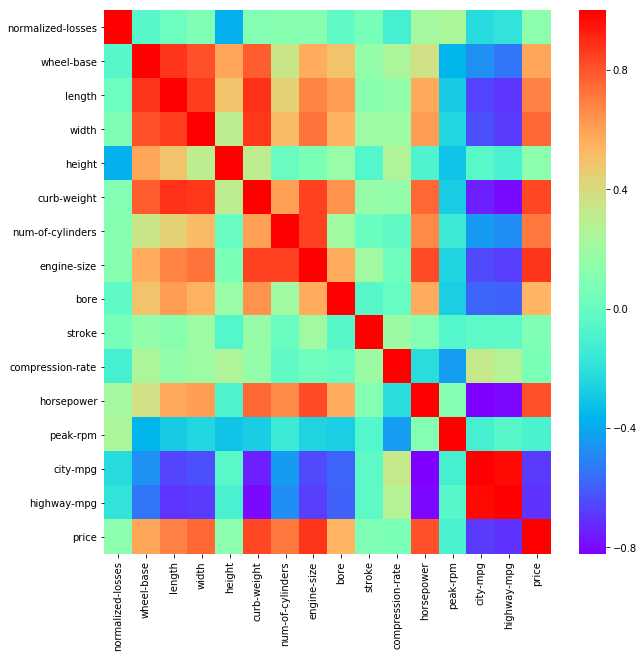

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(Main.corr(), cmap="rainbow")

In [33]:
#these columns seem uncorelated with price, so we can exclude them from the analysis
Main.corr()[abs(Main.corr()["price"])<0.25].price

normalized-losses    0.133999
height               0.135486
stroke               0.082267
compression-rate     0.071107
peak-rpm            -0.101542
Name: price, dtype: float64

In [34]:
Main_2 = Main[['wheel-base', 'length', 'width','curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg','price']]

In [35]:
Main_2.head()

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price
0,-1.680910,-0.438315,-0.851335,-0.014821,-0.342804,0.075201,0.519597,0.203476,-0.650624,-0.540937,13495.0
1,-1.680910,-0.438315,-0.851335,-0.014821,-0.342804,0.075201,0.519597,0.203476,-0.650624,-0.540937,16500.0
2,-0.708334,-0.243544,-0.185134,0.516789,1.544965,0.604724,-2.427374,1.354267,-0.961995,-0.687669,16500.0
3,0.165335,0.194690,0.147966,-0.422710,-0.342804,-0.430252,-0.524899,-0.037387,-0.183569,-0.100741,13950.0
4,0.099398,0.194690,0.243137,0.518722,0.601081,0.219617,-0.524899,0.310527,-1.117680,-1.274597,17450.0


We are ready to begin ML coding
# ML Coding

For different ___k___ neighbor values, we will define the optimum number of neighbors using cross-validation.

In [36]:
y= Main_2["price"]
Main_2.drop("price", axis=1, inplace=True)
X = Main_2

C:\Users\Nil\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Text(0, 0.5, 'RMS')

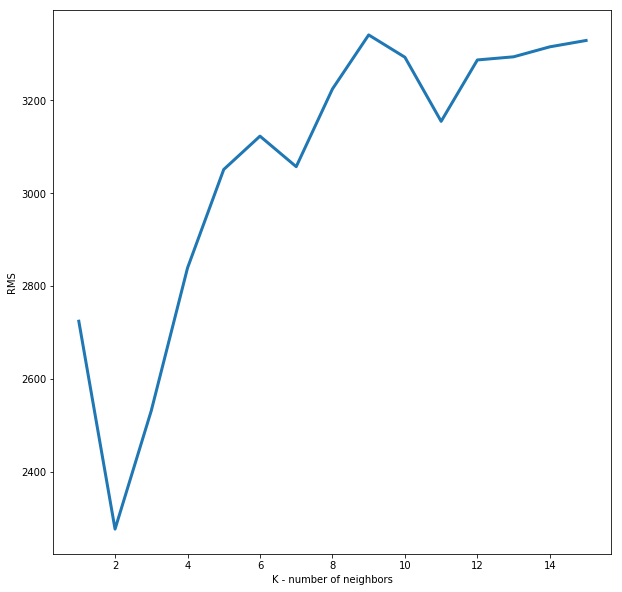

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt


rmses = []

for i in range(1,16):
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    
    rms = sqrt(mean_squared_error(y_test, predictions))
    rmses.append(rms)
rms_Series = pd.Series(rmses)

#rms_Series.plot()

plt.figure(figsize=(10,10))
sns.lineplot(x=range(1,16), y=rms_Series, lw=3)
plt.xlabel("K - number of neighbors")
plt.ylabel("RMS")

In [40]:
print(rms_Series)

0     2724.100134
1     2276.408791
2     2531.444763
3     2838.749939
4     3050.926424
5     3122.685543
6     3056.920307
7     3224.271801
8     3340.704385
9     3292.588325
10    3154.560931
11    3286.784017
12    3293.548784
13    3315.048989
14    3328.708834
dtype: float64


In [41]:
print(y.mean())

13207.129353233831


### As seen from the plot that optimum ___k___ value is equal to 2 and the minimum rms we can achive is USD 2276 where the mean of target column is USD 13207